In [11]:
import os
import numpy as np
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from dataset import Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")

In [3]:
d = Dataset(DATA_DIR)
X = d.df
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184.0,4864048.0,997039.0,...,2726448.0,137330562.5,83349063.1,37948997.6,47188243.3,13079.0,240505.0,1454952.0,2045232.0,52845651.0
0.01_0.01,252450897.0,327960.0,137767630.0,979578.5,27582160.6,24682983.4,122625213.3,2713983.0,4841167.0,1000459.0,...,2730348.0,136519570.9,83055190.7,36515639.4,47011233.4,27004.0,246039.0,1456007.0,2061588.0,52526322.9
0.01_0.02,237917834.0,333502.0,136942520.5,982527.5,27731948.3,24861056.7,120718004.0,2721780.0,5121413.0,992342.0,...,2730237.0,135731550.5,83833996.8,36427570.7,47459392.7,49974.0,247458.0,1483775.0,2091321.0,52263696.2
0.01_0.03,248882156.5,330325.0,136418725.5,963803.5,27997441.7,24579344.8,121296308.6,2714233.0,5052632.0,998329.0,...,2725032.0,136539908.8,83633367.8,36403075.4,46715551.6,15397.0,247531.0,1501840.0,2084955.0,52707245.7
0.01_0.04,296797127.5,333691.5,154771847.0,969474.0,27651486.9,24818776.0,122379430.1,2697366.0,4933404.0,992418.0,...,2678780.0,136728303.5,83927311.9,36431581.1,47188565.9,21914.0,251669.0,1485753.0,2070138.0,52363832.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965.0,5044125.0,1009405.0,...,2772113.0,136396155.9,83062217.7,36782333.1,46864140.0,25273.0,257743.0,1475990.0,2084802.0,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947.0,4943392.0,1010497.0,...,2706935.0,136114357.4,84179052.7,37262142.1,47588735.4,42807.0,244875.0,1484210.0,2097834.0,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120.0,4970150.0,1003911.0,...,2770895.0,137341151.5,84247285.9,36585310.5,46773550.6,37571.0,245023.0,1470336.0,2085445.0,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340.0,4965523.0,1003700.0,...,2744895.0,136099410.0,83997180.6,36323451.0,46507653.2,25706.0,257035.0,1493277.0,2097495.0,53712902.3


In [20]:
# Save X to the Excel file
# X.to_excel("dataframe_494_bus_with_index.xlsx", index=True)

In [13]:
# Load the Excel file

X = pd.read_excel("dataframe_494_bus_with_index.xlsx", index_col=0)

X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965,5044125,1009405,...,2772113,136396155.9,83062217.7,36782333.1,46864140.0,25273,257743,1475990,2084802,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947,4943392,1010497,...,2706935,136114357.4,84179052.7,37262142.1,47588735.4,42807,244875,1484210,2097834,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120,4970150,1003911,...,2770895,137341151.5,84247285.9,36585310.5,46773550.6,37571,245023,1470336,2085445,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340,4965523,1003700,...,2744895,136099410.0,83997180.6,36323451.0,46507653.2,25706,257035,1493277,2097495,53712902.3


In [14]:
# Check the number of rows in X and the length of y
y = np.array([float(i.split("_")[0]) * 100 for i in X.index])
y_binary = np.where(y == 0, 0, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.33, random_state=22)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = clf.predict(X_test_scaled)



MSE: 0.0152, MAE: 0.0152, Accuracy: 0.9848, Precision: 1.0000, Recall: 0.9688, F1: 0.9841


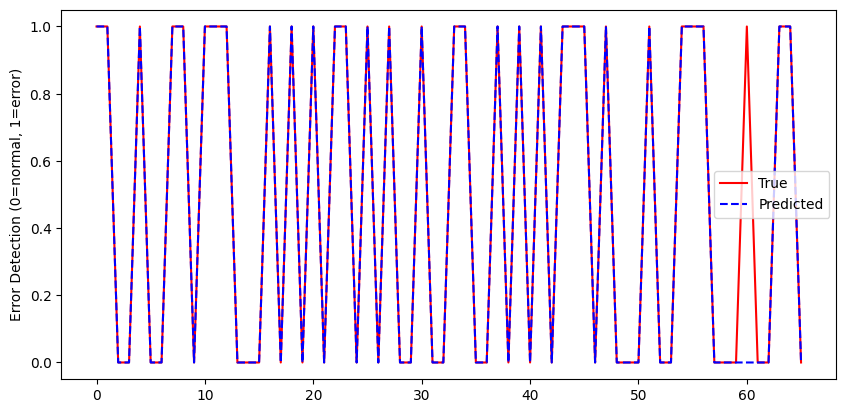

In [18]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, y_pred)
mse = mse_metric.result().numpy()

mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, y_pred)
mae = mae_metric.result().numpy()

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# 예측 결과 시각화
f = plt.figure()
plt.plot(range(len(y_test)), y_test, color="red", label="True")
plt.plot(range(len(y_pred)), y_pred, color="blue", linestyle='--', label="Predicted")
plt.ylabel("Error Detection (0=normal, 1=error)")
f.set_figwidth(10)
plt.legend()
plt.show()

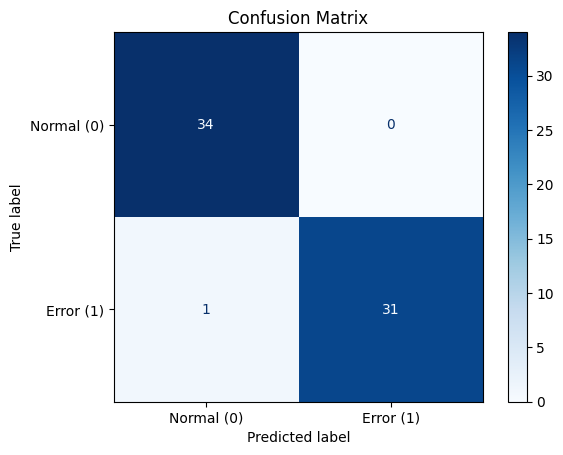

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Error (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()